## Monte Carlo pricer in the Black Scholes model

Pricing of Vanilla  and Barrier option with a Monte-Carlo method

##### Main Variables

In [9]:
import numpy as np
from math import *
N_simu=100
N_steps=10
sigma=0.3
r=0.01
T=2
S=100
dt=T/N_steps


##### Generate the distribution $S_{t}=S_{0}e^{(r-\sigma^{2}) \times t + \sigma W_{t}}$

In [10]:
rand = np.random.normal(0, sqrt(dt)*sigma, [N_simu, N_steps]) # Generate the brownians  sigma dWt
rand_drifted=rand+dt*(r - 0.5*sigma**2) # Add the drift term
cum_sum_rand=np.cumsum(rand_drifted, axis=-1) # compute the cumulated sum of drift term + sigma dWt
S_T=S*np.exp(cum_sum_rand) # Return a 2 dimensional array with ST

##### Plot the drawings of $S_{T}$

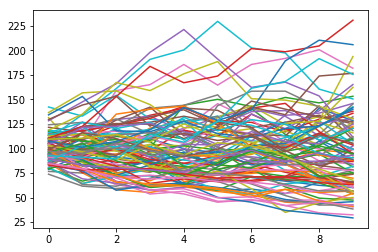

In [11]:
import matplotlib.pyplot as plt
plt.plot(S_T.T)
plt.show()

##### Vanilla option pricing: 
##### $Call = Df \times Max(0, S_{T}-K)$
##### $Put = Df \times Max(0, K-S_{T})$

In [12]:
DF=exp(-r*T) # Discount factor at maturity

In [13]:
option_type="call"
strike=100

if option_type=="call":
    payoff=np.maximum(0,S_T[:,-1]-strike)
    d_payoff=DF*payoff
    premium=np.mean(d_payoff)
    print("The premium of the {0} option of strike {1} is {2}".format(option_type, strike, premium))
elif option_type=="put":
    payoff=np.maximum(0,-S_T[:,-1]+strike)
    d_payoff=DF*payoff
    premium=np.mean(d_payoff)
    print("The premium of the {0} option of strike {1} is {2}".format(option_type, strike, premium))

The premium of the call option of strike 100 is 14.621768023181184


##### Pricing of an exotic option with barriers
We now price an exotic option: the note contains a barrier option ( pays a fixed coupon if the underlying spot is above a given barrier) and a down and in put (costs a put if the underlying goes below a Knock in barrier at any point in time)

In [14]:
coupon_barrier=90
coupon=0.03
coupon_barrier_observation_time=1
barrier_check=S_T[:,int(coupon_barrier_observation_time/dt)]>coupon_barrier
coupon_payoff=barrier_check.astype(int)*coupon
coupon_payoff

array([0.  , 0.  , 0.03, 0.03, 0.03, 0.03, 0.03, 0.  , 0.03, 0.03, 0.  ,
       0.  , 0.03, 0.  , 0.03, 0.  , 0.03, 0.  , 0.03, 0.03, 0.03, 0.  ,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.  , 0.  , 0.03, 0.  , 0.03, 0.  ,
       0.03, 0.03, 0.  , 0.  , 0.03, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.03, 0.03, 0.  , 0.03, 0.03, 0.03, 0.03, 0.  , 0.03, 0.03, 0.03,
       0.03, 0.  , 0.  , 0.03, 0.  , 0.03, 0.03, 0.  , 0.  , 0.  , 0.03,
       0.  , 0.  , 0.03, 0.03, 0.  , 0.03, 0.  , 0.  , 0.03, 0.03, 0.  ,
       0.03, 0.  , 0.03, 0.  , 0.  , 0.  , 0.03, 0.03, 0.03, 0.  , 0.  ,
       0.03, 0.03, 0.03, 0.  , 0.  , 0.  , 0.03, 0.03, 0.  , 0.03, 0.03,
       0.03])

In [15]:
#Coupon Payoff
coupon_barrier=90
coupon=0.03
coupon_barrier_observation_time=1
barrier_check=S_T[:,int(coupon_barrier_observation_time/dt)]>coupon_barrier
coupon_payoff=barrier_check.astype(int)*coupon
df_barrier=exp(-r*coupon_barrier_observation_time)

#DIP Payoff
dip_barrier=50
dip_barrier_check=S_T.min(axis=1)<dip_barrier
dip_barrier_check=dip_barrier_check.astype(int)
dip_strike=110
dip_payoff=dip_barrier_check*(np.maximum(0,-S_T[:,-1]+dip_strike))

Note_price=100*DF + df_barrier*np.mean(coupon_payoff)-DF*np.mean(dip_payoff)
print("The pricer of the barrier note is "+str(Note_price))

The pricer of the barrier note is 90.11623115841313
